<a href="https://colab.research.google.com/github/tmgrgg/nlp-mafiascum/blob/master/Create24HDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!git clone https://bitbucket.org/bopjesvla/thesis.git

fatal: destination path 'thesis' already exists and is not an empty directory.


In [0]:
cd /content/thesis/src

/content/thesis/src


#Our 24h version 

In [0]:
import numpy as np
import delong
import pandas as pd
import re
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt

wv = [("FastText", "wiki"), ("GloVe", "wiki")]
# wv = [("GloVe", "wiki200d"), ("GloVe", "twitter")]

cnt = lambda l, words: sum(l.count(w) for w in words)
cnt_phrases = lambda l, phrases: sum(l[i:i+len(p)]==p for p in phrases for i in range(len(l)))
contains_any = lambda l, words: sum(any(punc.find(w) != -1 for w in words) for punc in l)
not_contractions = [c.split("'") for c in "can't|couldn't|didn't|doesn't|don't|hadn't|hasn't|haven't|isn't|weren't|wasn't|shouldn't|aren't|won't".split("|")]
other_negations = "cannot|neither|never|no|nobody|none|nope|nor|not|nothing|nowhere|uhuh|without|wouldn|zero|zip".split("|")
neg_emotion = re.compile(r"^(abandon.*|abuse.*|abusive|ache.*|aching|advers.*|afraid|aggravat.*|aggress.*|agitat.*|agony|alarm.*|alone|anger.*|angr.*|anguish.*|annoy.*|antagoni.*|anxi.*|appall.*|apprehens.*|argu.*|arrogan.*|asham.*|assault.*|aversi.*|avoid.*|awful|bad|bastard|beaten|bewilder.*|bitch.*|bitter.*|blam.*|bore.*|boring|bother.*|burden.*|careless.*|cheat.*|complain.*|confus.*|contradic.*|crap.*|craz.*|cried|cries|critical|critici.*|cruel.*|crushed|cry|crying|cut|cynical|damn.*|danger.*|daze.*|decay.*|defeat.*|defect.*|defens.*|degrad.*|depress.*|depriv.*|despair.*|desperate.*|despis.*|destroy.*|destruct.*|devastat.*|devil.*|difficult.*|disagree.*|disappoint.*|disaster.*|discomfort.*|discourag.*|disgust.*|dislike|disliked|dislikes|dismay.*|distraught|distress.*|distrust.*|disturb.*|dominate.*|doom.*|doubt.*|dread.*|dull.*|dumb.*|dump.*|dwell.*|egotis.*|embarass.*|emotional|empt.*|enem.*|enrag.*|envious|envy|evil|excruciat.*|exhaust.*|fail.*|fatal|fatigu.*|fear|feared|fearing|fears|feud.*|fight|fighting|fights|flop.*|flunk.*|forbid.*|fought|frantic.*|freak.*|fright.*|frustrat.*|fuck.*|furious.*|gloom.*|goddam.*|gossip.*|grave.*|greed.*|grief|griev.*|grim.*|grind|gross.*|guilt.*|harass.*|hate|hated|hateful|hates|hating|hatred|hazy|hell|helpless.*|hesitant|homesick.*|hopeless.*|horribl.*|horrif.*|horror|hostil.*|humiliat.*|hurt.*|ignoran.*|impatien.*|impersonal|inadequate|indifferen.*|ineffect.*|inferior|inhib.*|insecur.*|insult.*|interrup.*|intimidat.*|irrational|irrita.*|isolat.*|jealous.*|jerk|jerked|jerks|kill.*|lame|liar.*|lie|lied|lies|loneli.*|lonely|lonesome|longing|lose|loser.*|losing|loss.*|lost|lous.*|low.*|ludicrous.*|mad|mess|messy|miser.*|miss|missed|misses|missing|molest.*|moody|mourn.*|nag.*|nast.*|neglect.*|nervous.*|numb|obnoxious.*|obsess.*|offend.*|outrag.*|overwhelm.*|pain|painf.*|painl.*|pains|panic.*|paranoi.*|pathetic.*|peculiar.*|pervert.*|pessimis.*|petrif.*|pett.*|piss.*|pitiful.*|pity|poison.*|prejudic.*|pressur.*|protest|protested|protesting|puk.*|punish.*|rage.*|rape.*|rebel.*|regret.*|reject.*|reluctan.*|remorse.*|repress.*|resent.*|resign.*|restless.*|revenge.*|ridicul.*|rigid.*|rude.*|ruin.*|sad|sarcas.*|scare.*|scream.*|screw.*|selfish.*|serious.*|severe.*|shak.*|shame.*|shit.*|shock.*|shy.*|sicken.*|silly|sin|sinister|sins|skeptical|smother.*|snob.*|sorrow.*|sorry|spite.*|startl.*|strain.*|strange|stress.*|stubborn.*|stunned|stuns|stupid|suck|sucked|sucking|sucks|suffer|suffered|suffering|suffers|suspicious.*|tear.*|teas.*|temper|tense.*|tension.*|terribl.*|terrified.*|terrifying|terror.*|threaten.*|tick|ticked|torture.*|tragedy|tragic|trembl.*|trick.*|troubl.*|turmoil|ugh|ugly|unattractive|uncertain|uncomfortable|uneas.*|unfortunate.*|unhapp.*|unimportant|unpleasant|unprotected|unsuccessful|unsure.*|upset.*|useless|vain|vanity|vicious.*|victim.*|violent.*|vulnerab.*|weak.*|weep.*|weird.*|whine.*|wicked.*|worr.*|worse.*|worthless|wrong.*)$")
sensory = re.compile(r"^(appear|appeared|appearing|appears|ask|asked|asking|asks|ate|bitter*|call|called|calling|calls|chat.*|contact.*|discuss.*|drank|drink|drinking|drinks|ear|ears|eat|eaten|eating|eats|eye.*|feel|feeling.*|feels|felt|grab.*|handl.*|hear|heard|hearing|hears|held|hold|holding|holds|hug.*|itch.*|listen|listened|listening|listens|look|looked|looking|looks|noise.*|observ.*|pain|painf.*|painl.*|pains|perceiv.*|perception.*|read|reading|reads|rub|rubbed|rubs|said|saw|say.*|see|seeing|seen|sees|sensation|sensations|sense|sensed|senses|sensing|show|showed|showing|shows|sight.*|skin|smell.*|sound.*|speak|speaking|speaks|spoke.*|squeez.*|stare.*|sweet|talk|talked|talking|talks|tast.*|tell|telling|tells|told|touch.*|view|viewed|viewing|views|vision.*|visual|watch*|witness)$")
anger = re.compile(r"^(abuse.*|abusive|aggravat.*|aggress.*|agitat.*|anger.*|angr.*|annoy.*|antagoni.*|argu.*|arrogan.*|assault.*|bastard|beaten|bitch.*|bitter.*|blam.*|cheat.*|contradic.*|crap.*|critical|critici.*|cruel.*|cut|cynical|damn.*|danger.*|defens.*|despis.*|destroy.*|destruct.*|disgust.*|distrust.*|dominate.*|dread.*|dumb.*|dump.*|enem.*|enrag.*|evil|feud.*|fight|fighting|fights|fought|frustrat.*|fuck.*|furious.*|goddam.*|greed.*|harass.*|hate|hated|hateful|hates|hating|hatred|hostil.*|humiliat.*|insult.*|interrup.*|intimidat.*|jealous.*|jerk|jerked|jerks|kill.*|liar.*|lied|lous.*|ludicrous.*|mad|molest.*|nag.*|nast.*|obnoxious.*|offend.*|outrag.*|paranoi.*|piss.*|poison.*|prejudic.*|punish.*|rage.*|rape.*|rebel.*|resent.*|revenge.*|ridicul.*|rude.*|sarcas.*|screw.*|shit.*|sinister|skeptical|smother.*|snob.*|spite.*|stubborn.*|stupid|suck|sucked|sucking|sucks|suspicious.*|teas.*|temper|terrified.*|terrifying|terror.*|threaten.*|tick|ticked|torture.*|trick.*|ugly|vicious.*|victim.*|violent.*|wicked)$")

spp = "thee thine thou thoust thy yall ya ye you your".split()
quantifiers = 'all some much many little few any lots lot plenty several more most less least none'.split()
insight = re.compile(r"^(accept|acknowledg.*|adjust.*|admit|admits|admitted|admitting|analys.*|analyz.*|answer.*|aware.*|became|believe|believed|believes|believing|clarif.*|clear|closure|cohere.*|compreh.*|concentrat.*|conclud.*|conclus.*|confess.*|construct.*|create.*|creating|decid.*|determina.*|determine|determined|determines|determining|discern.*|discl.*|discover.*|effect.*|enlighten.*|evaluat.*|examine.*|examining|explain|explained|explaining|explains|explanat.*|explor.*|feeling.*|feels|felt|figur.*|find.*|forgiv.*|found|gather.*|generate.*|grasp.*|inform|informs|insight.*|knew|know|knowing|knowl.*|known|knows|learn.*|meaning|meaningf.*|means|meant|motivate.*|perceiv.*|perception.*|ponder.*|question|questioning|questionned|questions|rational.*|realiz.*|reason.*|reckon.*|recognis.*|recogniz.*|reconsider.*|reconstruct.*|reflect.*|relate.*|relation.*|resolu.*|resolve|resolved|rethink.*|reveal.*|saw|secret|secrets|see|seeing|solution.*|solve.*|suspect.*|think|thinking|thinks|thought|thoughts|understand|understandable|understanding|understands|understood|wonder|wondered|wondering)$")

cognitive = re.compile(r"abandon.*|accept|accepted|accepting|accepts|achiev.*|acknowledg.*|adjust.*|admit|admits|admitted|admitting|affect|affected|affects|agree.*|anal|analys.*|analyz.*|answer.*|approv.*|arrange.*|assum.*|avoid.*|aware.*|barrier.*|bases|basis|became|because|become|becomes|becoming|believe|believed|believes|believing|block.*|brake.*|but|careful.*|caus.*|clarif.*|clear|clog.*|closure|cohere.*|complete|compreh.*|concentrat.*|concern.*|conclud.*|conclus.*|confess.*|confide|confided|confides|confiding|confirm.*|conflict.*|confus.*|consequen.*|constrain.*|constrict.*|construct.*|contain.*|contradic.*|control.*|cos|could|could'.*|couldn't|coz|create.*|creating|cuz|decid.*|defens.*|delay.*|deni.*|deny.*|depend|depended|depending|depends|describe|described|describes|describing|determina.*|determine|determined|determines|determining|digest.*|discern.*|discl.*|discover.*|disregard.*|done|doubt.*|duties|duty|effect.*|end|ended|ending.*|ends|enlighten.*|evaluat.*|examine.*|examining|expect.*|explain|explained|explaining|explains|explanat.*|explor.*|fact.*|feeling.*|feels|felt|figur.*|find.*|finish|fit|fits|forbid.*|forgiv.*|found|foundation.*|gather.*|generate.*|goal.*|grasp.*|guard.*|held|hence|hesitant|hesitat.*|hold|holding|holds|hope|hoped|hopef.*|hopes|hoping|how|how's|if|ignore.*|ignori.*|implic.*|incorporat.*|induc.*|infer|inferred|inferring|infers|influenc.*|inform|informs|inhib.*|initiat.*|insight.*|integrat.*|intell.*|interfer.*|justif.*|kind_of|kinda|knew|know|knowing|knowl.*|known|knows|learn.*|limit.*|meaning|meaningf.*|means|meant|mind.*|motivate.*|motive.*|must|need|needed|needing|needs|neglect.*|obstac.*|organize.*|organizing|origin|ought|outcome.*|perceiv.*|perception.*|ponder.*|pretty|prevent.*|produce.*|product|productive.*|prohib.*|purpose.*|question|questioning|questionned|questions|quit.*|rational.*|react.*|read|reading|reads|realiz.*|reason.*|reckon.*|recognis.*|recogniz.*|reconsider.*|reconstruct.*|reflect.*|refrain|refus.*|relate.*|relation.*|reluctan.*|remember.*|repress.*|require|required|requirement.*|requires|resolu.*|resolve|resolved|responsib.*|restrain.*|restrict.*|result.*|retard.*|rethink.*|reveal.*|rigid.*|root.*|saw|secret|secrets|see|seeing|seem|seemed|seems|settl.*|should|should'.*|shouldn't|since|smart.*|solution.*|solve.*|sort|sorta|source.*|stimul.*|stop|stopped|stopping|stops|structure.*|stubborn.*|suspect.*|therefor.*|think|thinking|thinks|thought|thoughts|thus|tried|tries|try|trying|understand|understandable|understanding|understands|understood|undo|unresolve.*|wait|waited|waiting|waits|want|wanted|wanting|wants|welcom.*|what|what's|why|why's|wish|wished|wishes|wishing|withheld|withhold|wonder|wondered|wondering|would|would'.*|wouldn'.*|yield.*")

motion= re.compile(r"^(action.*|advanc.*|approach|arrive|arrived|arrives|arriving|bring|bringing|brings|brought|carried|carries|carry|carrying|climb.*|cross|cruis.*|danc.*|deliver.*|depart|departs|disappear.*|drift.*|drive|driven|drives|driving|drove|enter|entered|entering|enters|explor.*|fled|flew|flies|fly|flying|follow|followed|following|follows|go|goes|going|gone|hik.*|jog.*|move|moved|moves|moving|pack|packed|packing|ran|run|running|runs|swim.*|take|takes|taking|took|transport.*|travel.*|visit.*|walk|walked|walking|walks|went)$")

tentative = re.compile(r"^(		alot|ambigu.*|any|anybod.*|anyhow|anyone.*|anything.*|anytime|anywhere|bet|bets|betting|conflict.*|confus.*|depend|depended|depending|depends|disorient.*|doubt.*|even|fortunat.*|fuzzy|guess|guessed|guesses|guessing|hazy|hesitant|hesitat.*|hope|hoped|hopef.*|hopes|hoping|just|kind_of|kinda|likel.*|luck|lucki.*|lucky|may|maybe|might|nearly|occasional.*|or|perhaps|possib.*|pretty|probab.*|puzzl.*|random|reckon.*|seem|seemed|seems|some|somebod.*|someone.*|something.*|sometime.*|sort|sorta|suppose|supposed|temporar.*|tentative.*|uncertain|unclear|undecided.*|unknow.*|unlikely|unresolve.*|unsure.*|vague.*|variable.*|wonder|wondered|wondering)$")

greeting = re.compile(r"\b(hey|hello|hi|howdy)\s+(guys|folks|all|everyone|everybody)\b")
greeting = re.compile(r"\b(hey|hello|hi|howdy)\b")

post_files = ["mini-normal1.json", "mini-normal2.json", "large-normal.json"]
slot_files = ["mini-normal-slots.json", "large-normal-slots.json", "old-normal-slots.json"]

posts = pd.concat(pd.read_json(fn, orient='records') for fn in post_files)
slots = pd.concat(pd.read_json(fn, orient='records') for fn in slot_files)

posts.set_index(['game_id', 'author'], inplace=True)

# remove post-game discussion

first_posts = posts[posts["post_no"] == 0]

# moderator makes the first post
mod_posts = posts.loc[first_posts.index]

# last vote count is the last game post
# everything after that is post-game discussion and should be discarded
vote_counts = mod_posts[mod_posts["content"].str.contains("vote ?count|vc|not voting \(", case=False)]
last_game_posts = vote_counts['post_no'].max(level=0)

game_posts = posts.join(last_game_posts, rsuffix='_last', how='inner')
game_posts = game_posts[game_posts['post_no'] <= game_posts['post_no_last']]

# concatenate all posts per player per game per day relative to a user's first post
# work out post day relative to user's first post
first_post_by_player = game_posts['inserted_at'].groupby(level=[0, 1]).min()
first_post_by_player.name = 'first_post_by_player_at'
game_posts = game_posts.join(first_post_by_player)
game_posts['time_since_first_post'] = game_posts['inserted_at'] - game_posts['first_post_by_player_at']

# remove final post day from game_posts (a user is allowed to talk for 24h before being quiet)
game_posts['post_day'] = game_posts['time_since_first_post'].apply(lambda x: x.days)
last_post_day = game_posts['post_day'].groupby(level=[0, 1]).max()
last_post_day.name = 'last_post_day'
game_posts = game_posts.join(last_post_day)
game_posts = game_posts[game_posts['post_day'] < game_posts['last_post_day']]

#TODO: remove moderator
# join all posts to a document; filter out the last 24h of each document
# this is the line we want to change... 
groups = game_posts.sort_values('post_no').groupby(['author', 'game_id', 'post_day'], sort=False)
docs = groups.apply(lambda g: ' /!@ '.join(g['content'])).to_frame(name='content')

docs['inserted_at'] = groups['inserted_at'].min()
docs['updated_at'] = groups['inserted_at'].max()
docs.reset_index(inplace=True)

slots['scum'] = slots['role'].str.contains("mafia|goon|wolf|serial.?killer", case=False) | slots['role'].str.contains("SK")
slots['town'] = slots['role'].str.contains("town", case=False)
slots['sk'] = slots['role'].str.contains("serial.?killer", case=False) | slots['role'].str.contains("SK")

# filters incomplete alignment distributions
# use this when calculating game size/scum ratio correlations
# slots = slots.groupby('game_id').filter(lambda g: all(pd.notnull(g['scum'])))

slots = slots[~(slots['town'] & slots['scum']) & ~slots['sk']]
slots = slots.groupby('game_id').filter(lambda g: any(g['scum']))

slots['replacements'] = slots['users'].map(lambda x: len(x) - 1)

slots.reset_index(inplace=True)
users = pd.DataFrame({'game_id': slot['game_id'], 'author': user, 'scum': slot['scum'], 'slot_id': i, 'event': slot['event']} for i, slot in slots.iterrows() for user in slot['users'])

docs = pd.merge(docs, users, on=['game_id','author'], how='inner')

docs['words'] = docs['content'].apply(lambda c: re.findall(r"\w+", c.lower(), re.UNICODE))
docs['wc'] = docs['words'].map(len)

print("UNFILTERED:")
print(slots.groupby('scum').mean())
print(docs['game_id'].nunique(), "games,", docs['slot_id'].nunique(), "slots,", len(docs), "documents")
print("scum ratio = ", sum(docs['scum']) / len(docs))

docs = docs[docs['wc'] >= 50]
docs = docs[docs['wc'] <= 5000]

print("\nWC >= 50:")
print(slots.groupby('scum').mean())
print(docs['game_id'].nunique(), "games,", docs['slot_id'].nunique(), "slots,", len(docs), "documents")
print("scum ratio = ", sum(docs['scum']) / len(docs))

UNFILTERED:
             index       game_id     sk  replacements
scum                                                 
False  2325.532491  27982.241972  False      0.334348
True   2330.823069  28322.906054  False      0.351775
685 games, 8053 slots, 166145 documents
scum ratio =  0.23333834903247164

WC >= 50:
             index       game_id     sk  replacements
scum                                                 
False  2325.532491  27982.241972  False      0.334348
True   2330.823069  28322.906054  False      0.351775
685 games, 7940 slots, 112523 documents
scum ratio =  0.23805799703171796


In [0]:
docs.to_pickle('/content/drive/My Drive/24h_of_deception_basic.pickle')

In [0]:
cnt = lambda l, words: sum(l.count(w) for w in words)

docs['punc'] = docs['content'].apply(lambda c: re.findall(r"[^\w\s]+", c.lower(), re.UNICODE))
docs['or_ratio'] = docs['words'].apply(lambda d: d.count('or')) / docs['wc']
docs['neg_em_ratio'] = docs['words'].apply(lambda d: sum(re.match(neg_emotion, word) != None for word in d)) / docs['wc']
docs['anger_ratio'] = docs['words'].apply(lambda d: sum(re.match(anger, word) != None for word in d)) / docs['wc']
docs['sensory_ratio'] = docs['words'].apply(lambda d: sum(re.match(sensory, word) != None for word in d)) / docs['wc']
docs['cog_ratio'] = docs['words'].apply(lambda d: sum(re.match(cognitive, word) != None for word in d)) / docs['wc']
docs['insight_ratio'] = docs['words'].apply(lambda d: sum(re.match(insight, word) != None for word in d)) / docs['wc']
docs['motion_ratio'] = docs['words'].apply(lambda d: sum(re.match(motion, word) != None for word in d)) / docs['wc']
docs['tent_ratio'] = docs['words'].apply(lambda d: sum(re.match(tentative, word) != None for word in d)) / docs['wc']
print("regex done")
docs['not_ratio'] = docs['words'].apply(lambda d: cnt_phrases(d, not_contractions) + cnt(d, other_negations)) / docs['wc']
docs['fpp_ratio'] = docs['words'].apply(lambda d: cnt(d, ['i','we','my','mine','our','ours', 'myself', 'ourselves'])) / docs['wc']
docs['spp_ratio'] = docs['words'].apply(lambda d: cnt(d, spp)) / docs['wc']
docs['tpp_ratio'] = docs['words'].apply(lambda d: cnt(d, ['he','she','him','her','his','hers','they','them','their','theirs','themselves','himself','herself'])) / docs['wc']
docs['quant_ratio'] = docs['words'].apply(lambda d: cnt(d, quantifiers)) / docs['wc']
docs['sentence_length'] = docs['punc'].apply(lambda d: contains_any(d, ['.','!','?'])) / docs['wc']
print("did things")
docs['but_ratio'] = docs['words'].apply(lambda d: d.count('but')) / docs['wc']
docs['token_length'] = docs['words'].apply(lambda d: sum(map(len, d))) / docs['wc']
docs['unique_tokens'] = docs['words'].apply(lambda d: len(set(d))) / docs['wc']
docs['message_count'] = docs['punc'].apply(lambda d: d.count('/!@') + 1)
docs['message_length'] = docs['wc'] / docs['message_count']
#docs['sentence_length'] = sum(docs['punc'].str.contains(r"\.|!|\?")) / docs['wc']
docs['time'] = 1 + (docs['updated_at'] - docs['inserted_at']) / np.timedelta64(1, 'D')
docs['wc24h'] = docs['wc'] / docs['time']
docs['msg24h'] = docs['message_count'] / docs['time']

regex done
did things


error: ignored

attempted to convert 73465230 words to word embeddings, failed on 1023402 
success ratio = 0.9860695733206035
[==============================================----] 92.4% 233.0/252.1MB downloadedattempted to convert 73489040 words to word embeddings, failed on 999592 
success ratio = 0.9863980805845334
            game_id   post_day      slot_id  ...      time       wc24h    msg24h
scum                                         ...                                
False  29147.066040  20.748577  4293.049069  ...  1.334115  243.159313  3.880898
True   29764.140665  21.210886  4258.035166  ...  1.296877  238.397388  3.422019

[2 rows x 26 columns]
685 games, 7940 slots, 112523 documents
scum ratio =  0.23805799703171796
wc24h
wc24h & 0.498 \tabularnewline
or_ratio
or ratio & 0.535 \tabularnewline
tpp_ratio
tpp ratio & 0.522 \tabularnewline
spp_ratio
spp ratio & 0.512 \tabularnewline
fpp_ratio
\textbf{fpp ratio} & \textbf{0.597} \tabularnewline
but_ratio
but ratio & 0.481 \tabularnewline
token

IndexError: ignored

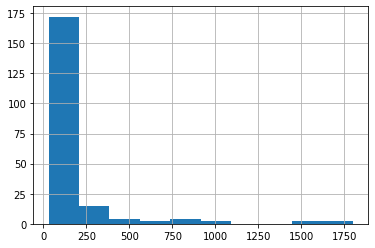

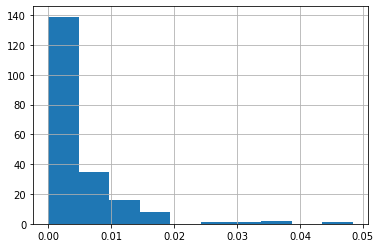

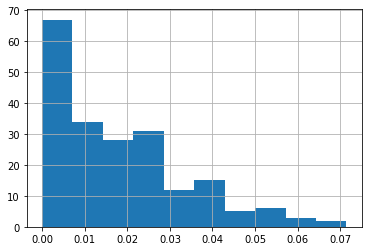

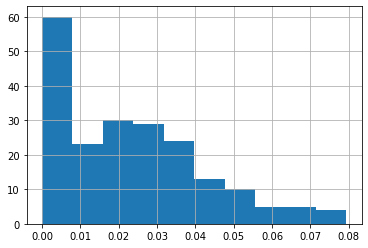

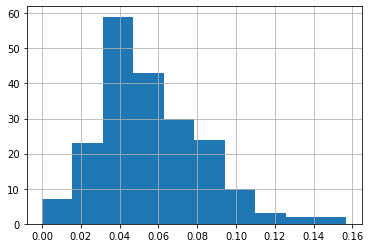

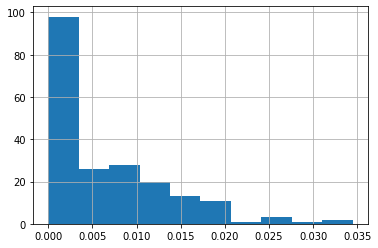

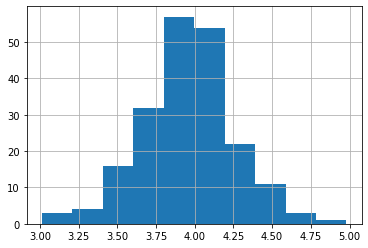

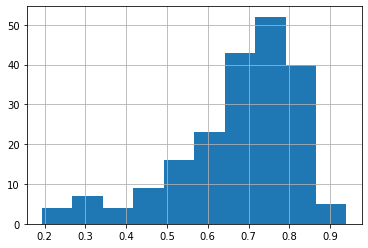

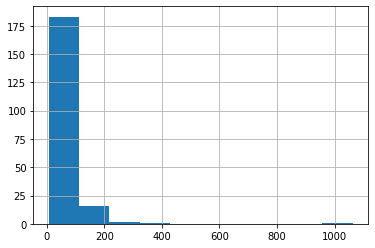

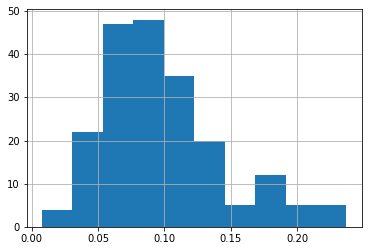

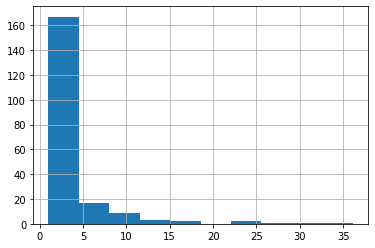

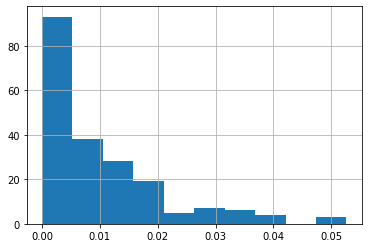

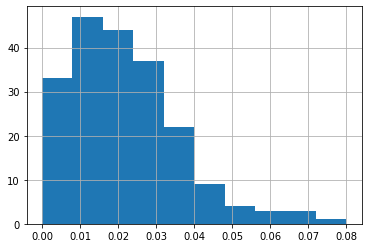

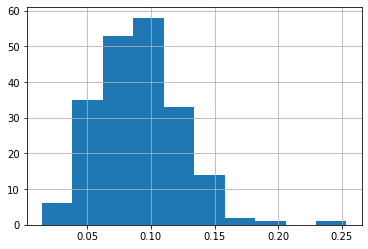

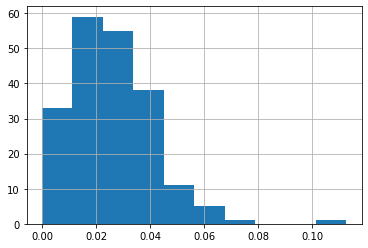

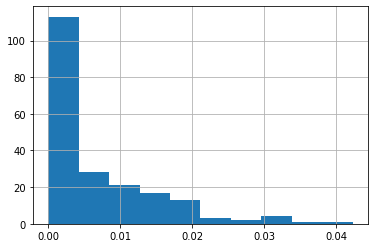

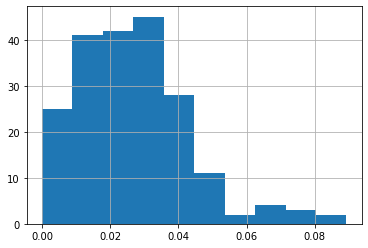

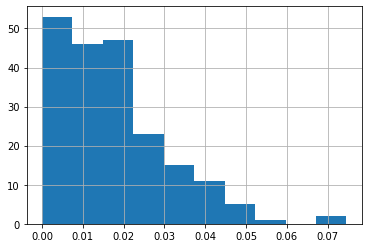

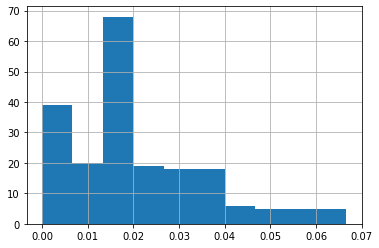

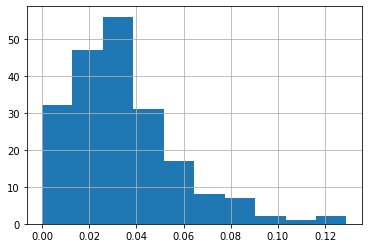

In [0]:
import gensim.downloader as api

from gensim.models.wrappers import FastText
from gensim.models import KeyedVectors

wv = [("FastText", "fasttext-wiki-news-subwords-300"), ("GloVe", "glove-wiki-gigaword-200")]
for m, dataset in wv:
    #x = FastText.load_fasttext_format(dataset + ".en") if m == "FastText" else KeyedVectors.load_word2vec_format('w2v.'+ dataset+'.txt', binary=False)
    x = api.load(dataset)
    total_count = missing_count = 0

    def V(w):
        global total_count, missing_count
        try:
            total_count += 1
            return x[w]
        except KeyError:
            missing_count += 1
            return None

    # exclude numbers since pre-trained model does not have ngrams for them
    docs['vector_' + m + '_' + dataset] = docs['words'].apply(lambda ws: np.mean([V(word) for word in ws if not V(word) is None], axis=0))

    print("attempted to convert", total_count, "words to word embeddings, failed on", missing_count,
        "\nsuccess ratio =", (total_count - missing_count) / total_count)

    # if USE_DOCS:
    #     docs.to_pickle('fasttext-'+dataset+'-avg.pkl' if FASTTEXT else 'glove-'+dataset+'-avg.pkl', compression='gzip')
    # else:
    #     docs.to_pickle('fasttext-'+dataset+'-avg-posts.pkl' if FASTTEXT else 'glove-'+dataset+'-avg-posts.pkl', compression='gzip')

all_docs = docs

In [0]:
docs.to_pickle('/content/drive/My Drive/24h_of_deception_full_features.pkl')